In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [2]:
df = pd.read_csv('Final_bank.csv')
df.head()

,CustomerId,Age,CreditScore,Tenure,TransactionFrequency,AvgTransactionAmount,ComplaintsFiled,CustomerSatisfaction,HasLoan,Balance,Churn
0,15634602,42,619,2,7,2173.57,4,3,0,1000.00,1
1,15647311,41,608,1,27,47136.49,1,3,0,83807.86,0
2,15619304,42,502,8,27,49700.37,3,5,0,159660.80,1
3,15701354,39,699,1,16,18492.24,1,2,1,1000.00,0
4,15737888,43,850,2,29,5138.65,3,5,0,125510.82,0


In [3]:
#df.isnull().sum()

In [4]:
#df.info()

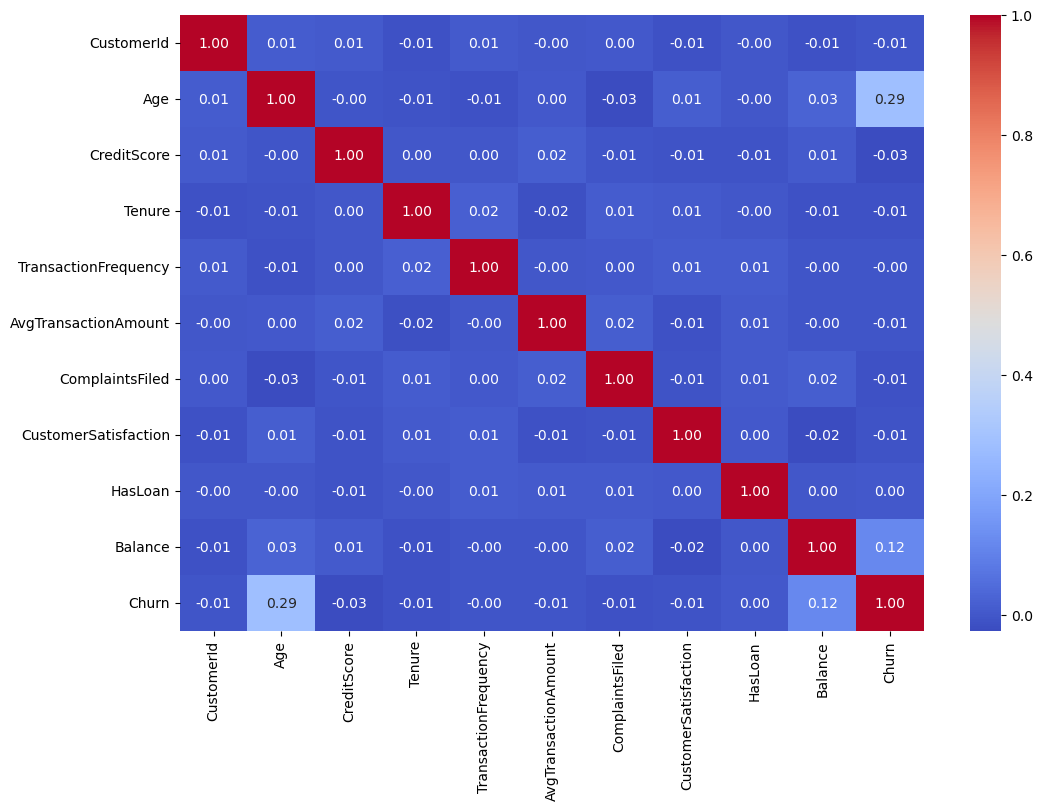

In [5]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [6]:
x = df.drop('Churn' , axis = 1)
y = df['Churn']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [1]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

In [10]:
x_train = np.expand_dims(x_train, axis=1)  # Now x_train.shape == (samples, timesteps=1, features)
x_test = np.expand_dims(x_test, axis=1)    # Similarly for x_test

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [15]:
churn_model = Sequential()
churn_model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
churn_model.add(Dense(32, activation='relu'))  # Hidden layers
churn_model.add(Dense(16, activation='relu'))
churn_model.add(Dense(1, activation='sigmoid'))

C:\Users\Admin\Documents\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
churn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compile the model

In [23]:
churn_model.fit(x_train, y_train, epochs=10, batch_size=32) # Train the model

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7976 - loss: 0.5275
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7953 - loss: 0.4533
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7986 - loss: 0.4404
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8024 - loss: 0.4341
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8155 - loss: 0.4206
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8133 - loss: 0.4240
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8132 - loss: 0.4278
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8162 - loss: 0.4217
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8137 - loss: 0.4188
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8137 - loss: 0.4162


In [27]:
loss, accuracy = churn_model.evaluate(x_test, y_test)
print('Accuracy:', accuracy)
print('Loss:', loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8103 - loss: 0.4355
Accuracy: 0.8134999871253967
Loss: 0.42052343487739563


In [ ]:
# import pickle

# with open('churn_model.pkl', 'rb') as file:
#     churn_model_data = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'churn_model.pkl'